# Data management project: How to choose the best accomodation for your vacation in Belgium?
# Part 3: Modelling
**By Iman Ajdamova and Pauline Colle** 

**Objective:**

In this part of the project, we will try to model the relationship of the price with the other variables collected. The purpose is to determine which variables matters in determining the price, thereby enabling the consumer to make an informed choice. This will be achieved through a supervised machine learning procedure using a linear regression. In machine learning, an algorithm is used to search for the model that captures the best relationship. We first estimate the different models on a training set and test how well the model fits the test set, then choose the best model.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

**Supervised ML**
- typical supervised ML procedure:
    1. Labeled data: decompose the observations in test/training set and pre-processing of the input variables
    2. Learning: on a restricted sample: the training set; use an alogorithm to "learn" the association pattern between the input variables and the label
    3. Assessing how the model fits the data (and choosing the best model): test the validity of the model on a test set (sample of the labeled data that had been held out); fit measured using the mean squarred error"
    4. Training the best model on the full data
    5. Using the trained model for prediction tasks
  

# Loading and cleaning the data

In [25]:
df=pd.read_excel("C:/Users/32498/Downloads/ECON2206-Data-Management-2023-main/GitHub/Project-data/Abritel_merged.xlsx")
df['lnprice']=np.log(df['Price per Night'])
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,lnprice
418,3 N appartement,Appartement,0,113,1472,0.0,0,Particulier,6,2,1,Eupen,50.630567,6.031272,4.727388
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165,2143,0.0,0,Annonce professionnelle,2,1,0,Sint-Andries,51.192022,3.178019,5.105945
420,Villa Oostduinkerke,Villa,0,89,1156,0.0,0,Particulier,6,3,4,Oostduinkerke,51.115634,2.681266,4.488636
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129,1678,3.5,2,Particulier,4,2,3,Collignon,50.867604,4.373712,4.859812
422,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,216,2809,3.3,3,Annonce professionnelle,2,1,1,Quartier du Centre - Centrumwijk,50.846718,4.353221,5.375278


In [26]:
df['Price per Night']=df['Price per Night'].astype(float)
df['Total Price']=df['Total Price'].astype(float)
df['Number of Guests'] = df['Number of Guests'].astype(float)
df['Number of Bedrooms'] =df['Number of Bedrooms'].astype(float)
df['Number of Beds'] = df['Number of Beds'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Appreciations'] = df['Appreciations'].astype(float)
df.tail()

,Name,Type,hote premium,Price per Night,Total Price,Rating,Appreciations,Type of annoucement,Number of Guests,Number of Bedrooms,Number of Beds,lieu,latitude,longitude,lnprice
418,3 N appartement,Appartement,0,113.0,1472.0,0.0,0.0,Particulier,6.0,2.0,1.0,Eupen,50.630567,6.031272,4.727388
419,Appartement Van Hecke dans le centre-ville d'A...,Appartement,0,165.0,2143.0,0.0,0.0,Annonce professionnelle,2.0,1.0,0.0,Sint-Andries,51.192022,3.178019,5.105945
420,Villa Oostduinkerke,Villa,0,89.0,1156.0,0.0,0.0,Particulier,6.0,3.0,4.0,Oostduinkerke,51.115634,2.681266,4.488636
421,"Appartement privé sise à Chaussée de Haecht, 3...",Appartement,0,129.0,1678.0,3.5,2.0,Particulier,4.0,2.0,3.0,Collignon,50.867604,4.373712,4.859812
422,Smartflats Manneken Pis V - 1 Chambre - Centre...,Appartement,0,216.0,2809.0,3.3,3.0,Annonce professionnelle,2.0,1.0,1.0,Quartier du Centre - Centrumwijk,50.846718,4.353221,5.375278


In [27]:
print(df.dtypes)

Name                    object
Type                    object
hote premium             int64
Price per Night        float64
Total Price            float64
Rating                 float64
Appreciations          float64
Type of annoucement     object
Number of Guests       float64
Number of Bedrooms     float64
Number of Beds         float64
lieu                    object
latitude               float64
longitude              float64
lnprice                float64
dtype: object


## Correlation

In [28]:
df_numerical = df.select_dtypes(include='float')
features = df_numerical.drop(columns=['Total Price','Price per Night'])
features.head()

,Rating,Appreciations,Number of Guests,Number of Bedrooms,Number of Beds,latitude,longitude,lnprice
0,4.5,51.0,7.0,3.0,7.0,51.118739,2.634960,4.804021
1,4.7,59.0,5.0,2.0,4.0,50.350609,5.493284,4.736198
2,5.0,1.0,2.0,1.0,0.0,51.238941,2.972449,4.343805
3,0.0,0.0,5.0,2.0,4.0,51.346426,3.275348,5.164786
4,4.7,94.0,5.0,2.0,3.0,50.842350,4.383945,4.605170


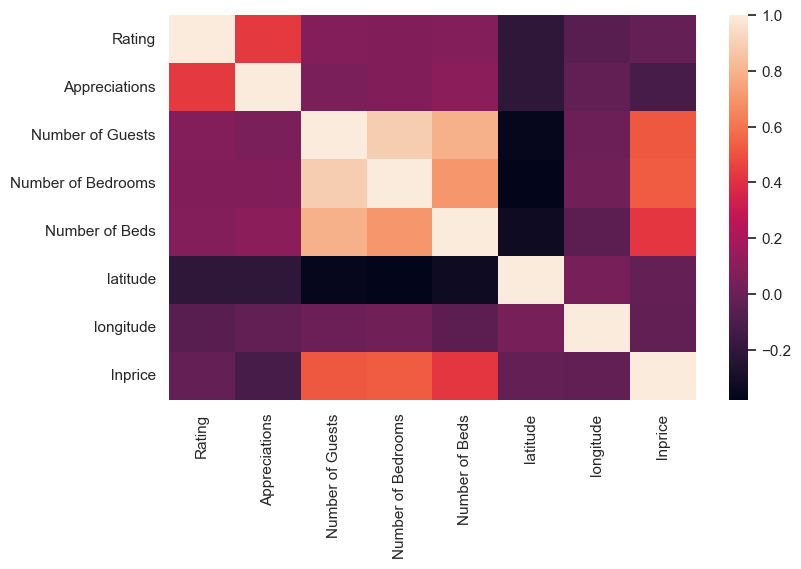

In [29]:
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = features.corr().round(2)
sns.heatmap(correlation_matrix) 
plt.show()

**Interpretation**

Before trying to model our data thanks to machine learning, it can be interesting to see what variables are correlated or not together. In our supervised machine learning model, our variable of interest is the price, that we would like to model thanks to other explanatory variables gathered during the webscrapping part. 

We can see from the correlation matrix, that the price depends mostly on the three variables that are the number of guests, the number of bedrooms and the number of beds. These three variables are highly connected, and it makes sense that the price per night will be higher if more people can stay at the accommodation. 

We can also see that there is some slight correlation with the rating, as we found in the visualisation notebook.

# Supervised Machine Learning

## 1. Creating $X$ and $Y$

In [30]:
y=df['lnprice']
features=df.drop(columns=['lnprice','Price per Night', 'Total Price'])

In [31]:
cat_col = [col for col in features if df[col].dtype == 'object']
dum_col = [col for col in features if df[col].dtype == 'int64']
num_col = [col for col in features if df[col].dtype == 'float64']

In [32]:
x=features[num_col+dum_col]

In [33]:
cols_M1=['Rating','Number of Guests','Number of Bedrooms','Number of Beds']
cols_M2=cols_M1+['Appreciations','latitude','longitude']+['hote premium']
cols_M2

['Rating',
 'Number of Guests',
 'Number of Bedrooms',
 'Number of Beds',
 'Appreciations',
 'latitude',
 'longitude',
 'hote premium']

*Notes:*

We have defined the dependent variable, y, as the logarithm of the price per night. As for the independent variables, we have taken all the columns that are either numerical, i.e. that have the type 'float', and the dummies variables, i.e. that have the type int. 

Moreover, we would like to compare two different models, to see which one performs better. Looking at the correlation matrix, we see that the columns with the higher correlation are the number of guests, the number of bedrooms and the number of beds. In addition, we are quite interested in investigating the impact of the rating on the price. Therefore, the first model will only consist of these 4 variables. For the second model, the rest of the numerical and dummies variables will be added.

## 2. Split train test sets

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (338, 8) (338,)
test data (85, 8) (85,)


In [35]:
#Select the training and test sets for both models
X_train_M1=X_train[cols_M1]
X_test_M1 =X_test[cols_M1]

X_train_M2=X_train[cols_M2]
X_test_M2=X_test[cols_M2]

#### Model 1

In [36]:
numeric_columns_M1=list(X_train_M1.select_dtypes('float64').columns)
categorical_columns_M1=list(X_train_M1.select_dtypes('int64').columns)

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns_M1),
    ('cat', OneHotEncoder() ,categorical_columns_M1),
])

pipeline

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Rating', 'Number of Guests',
                                  'Number of Bedrooms', 'Number of Beds']),
                                ('cat', OneHotEncoder(), [])])

In [38]:
X_train_scaled_M1=pipeline.fit_transform(X_train_M1)
X_test_scaled_M1=pipeline.fit_transform(X_test_M1)

*Explanations:*
- Through the pipeline, the two columns of the first model, that are the numeric and categorical column,  are modified thanks to different transformers:
    - The StandardScaler transformer will standardize the numerical values, by subtracting the mean and dividing by the standard deviation.
    - The OneHotEncoder transformer creates a binary dummy variable for each category in the categorical column. Even thought there are no dummies variables in the first model, there is one in the second model. Therefore,  the variable "hote premium" in model 2 will be split into two variables, since each category is encoded as a separate binary column.

#### Model 2

In [39]:
numeric_columns_M2=list(X_train_M2.select_dtypes('float64').columns)
categorical_columns_M2=list(X_train_M2.select_dtypes('int64').columns)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns_M2),
    ('cat', OneHotEncoder() ,categorical_columns_M2),
])

pipeline

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Rating', 'Number of Guests',
                                  'Number of Bedrooms', 'Number of Beds',
                                  'Appreciations', 'latitude', 'longitude']),
                                ('cat', OneHotEncoder(), ['hote premium'])])

In [41]:
X_train_scaled_M2=pipeline.fit_transform(X_train_M2)
X_test_scaled_M2=pipeline.fit_transform(X_test_M2)
X_train_scaled_M2.shape

(338, 9)

In [42]:
feature_names = pipeline.get_feature_names_out()
feature_names

array(['num__Rating', 'num__Number of Guests', 'num__Number of Bedrooms',
       'num__Number of Beds', 'num__Appreciations', 'num__latitude',
       'num__longitude', 'cat__hote premium_0', 'cat__hote premium_1'],
      dtype=object)

*Note:* As we can see on the aboved-cells and as already explained, there is one more columns since the hote premium variable has been split into two. This information will be useful later on.

## 3. Select and train a model

We consider the `LinearRegression` for the regression algorithm.

#### Model 1

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train_M1, y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg1.score(X_train_M1, y_train), 2)))

R-squared for training dataset:0.27


In [45]:
lin_reg1.fit(X_train_scaled_M1, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg1.score(X_train_scaled_M1, y_train), 2)))

R-squared for training dataset & scaled features:0.27


*Explanations*:

We compare the $R^2$ of the linear regression on the original and scaled features to examine their performance. Sometimes, scaling the numerical features can improve the performance of the model. We can notice that in this case, the two $R^2$ are equal.

*Interpretation*:

$R^2$ expresses the proportion of the total variance of Y that is explained by the independent variables of the model. The one we found here is not extremely high, but the variables we have are already explaining 27% of the variance of the price.

As a consequence, we can say that these variables are useful in determining the price, so consumers should take them into account, but there are other factors affecting it. Let's look at the value of the $R^2$ for the second model, to see whether it performs better.

#### Model 2

In [46]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_M2, y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg2.score(X_train_M2, y_train), 2)))

R-squared for training dataset:0.35


In [47]:
lin_reg2.fit(X_train_scaled_M2, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg2.score(X_train_scaled_M2, y_train), 2)))

R-squared for training dataset & scaled features:0.35


*Interpretation*: 

We can see that the model 2 has a better $R^2$ than the model 1, it seems therefore more appropriate to use the second model.
We can now look at the coefficients and the mean squared error of this model.

### Coefficients of the linear regression

In [48]:
lin_reg2.coef_

array([ 0.0209145 ,  0.04228763,  0.25218791,  0.06197887, -0.06611156,
        0.12219873, -0.02904097,  0.05895181, -0.05895181])

In [52]:
print('The coefficients of the features from the linear model:')
print(dict(zip(cols_M2, [round(x, 2) for x in lin_reg2.coef_])))

The coefficients of the features from the linear model:
{'Rating': 0.02, 'Number of Guests': 0.04, 'Number of Bedrooms': 0.25, 'Number of Beds': 0.06, 'Appreciations': -0.07, 'latitude': 0.12, 'longitude': -0.03, 'hote premium': 0.06}


**Interpretation**:

These coefficients correspond to the partial correlation between the outcome (y) and each variable. The first thing that can be done is to look at the values of these coefficients. We can see that all variables have a positive coefficient, i.e. they are positively correlated with the logarithm of the price, except for the appreciations and the longitude. 

Moreover, we note that the highest coefficient corresponds to the variable "number of bedrooms". We know of course that the variable number of guests, bedrooms and beds are the most likely to positively influence the price. But now, we can see that it is actually the number of bedrooms that matters the most in determining the price.  

Moreover, the coefficient of latitude is quite high. 

To determine whether these coefficients are significant, we should look at their p-values.

**Are the coefficients significant?**

In [55]:
import statsmodels.api as sm

In [56]:
X_train_with_intercept = sm.add_constant(X_train_scaled_M2)
model=sm.OLS(y_train, X_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     22.21
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           4.79e-27
Time:                        11:19:30   Log-Likelihood:                -202.12
No. Observations:                 338   AIC:                             422.2
Df Residuals:                     329   BIC:                             456.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3103      0.017    200.578      0.000       3.278       3.343
x1             0.0209      0.027      0.762      0.446      -0.033       0.075
x2             0.0423      0.068      0.619      0.537      -0.092       0.177
x3             0.2522      0.059      4.268      0.000       0.136       0.368
x4             0.0620      0.041      1.526      0.128      -0.018       0.142
x5            -0.0661      0.029     -2.309      0.022      -0.122      -0.010
x6             0.1222      0.027      4.477      0.000       0.068       0.176
x7            -0.0290      0.024     -1.188      0.236      -0.077       0.019
x8             1.7141      0.026     66.662      0.000       1.664       1.765
x9             1.5962      0.029     55.320      0.000       1.539       1.653
==============================================================================
Omnibus:                       19.760   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.543
Skew:                           0.585   Prob(JB):                     2.10e-05
Kurtosis:                       3.399   Cond. No.                     1.95e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In this OLS model, we have the coefficient corresponding to the variables as follows: x1=Rating, x2=Number of Guests, x3= Number of Bedrooms, x4=Number of Beds, x5=Appreciations, x6=latitude, x7=longitude, x8= hote premium with value 0, x9=hote premium with value 1.

A coefficient will be non-significant if its p-value is higher than 5%. They are thus 4 non-significant variables in this linear regression: the coefficients of the rating, the number of guests, the number of beds and the longitude. Therefore, when looking at an accommodation, if customers are most focused on the price aspects, they should not take those variables too much in account. However, the other coefficients are significant, i.e. the ones for: the number of bedrooms, the number of appreciations, the latitude, and both vaues of the hote premium variable. 

Therefore, when customers are looking for accommodation, if they want a cheaper one they should look for one with fewer bedrooms. Having less bedrooms does not mean that fewer people can stay at the place, but they will have less room.  

Moreover, we see that the location has some influence, especially the latitude. It is difficult to interpret this, but what we can say from the maps drawn in the visualisation part, is that they are some areas where prices are higher. 

It should be kept in mind that those results comes from a regression that has several assumptions, which might not always fit to the reality. Moreover, the sample being not really large, it is complicated to draw a conclusion for the whole population. The results might just be valid for the sample of observations gathered in the webscrapping part, i.e. the accommodation available in Belgium, the two first week of September.

## 4. Metrics/ Error measures

In [57]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_scaled_M2, y_train)
y_train_pred = lin_reg2.predict(X_train_scaled_M2)

**MSE on train set**

In [58]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse)

RMSE: 0.44001758696575355


**MSE on test set**

In [59]:
y_test_pred = lin_reg2.predict(X_test_scaled_M2)    
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMSE: %s" % test_rmse) 

RMSE: 0.42497691072330074


**Interpretation**

The mean squared error is a metric of how well a model fits the data. It measures the average squared difference between the observed and predicted value. A model with no error will have an MSE of zero. Taking the root of the MSE gives the root mean square error (RMSE), which measures the average difference between a statistical model's predicted values and the actual values.

We would therefore like a model with the smallest MSE and RMSE as possible. In our model, there would still be room to improve the RMSE.

## 5. Graphical representation

### Binned regression plots

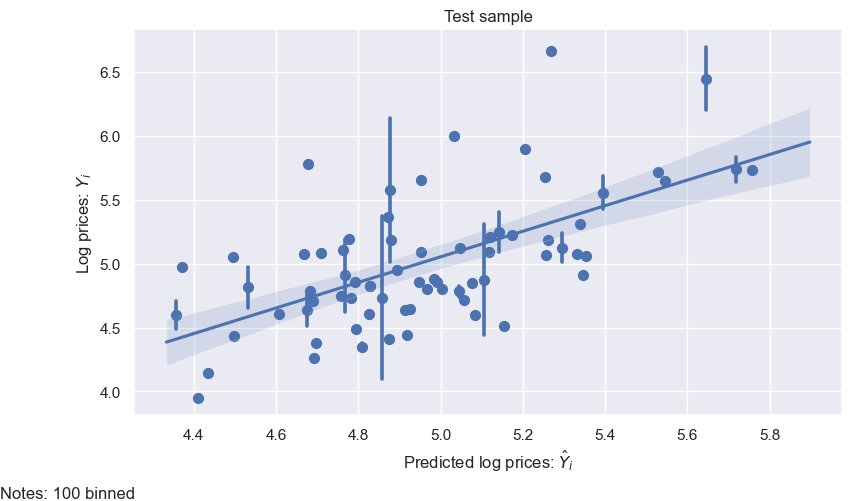

In [60]:
import seaborn as sns

g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")
plt.xlabel("Predicted log prices: $\hat{Y}_i$")
plt.ylabel("Log prices: $Y_i$")

plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

**Interpretation**: The binned regression plot tells us if the model is well specified, which looks true in this case.

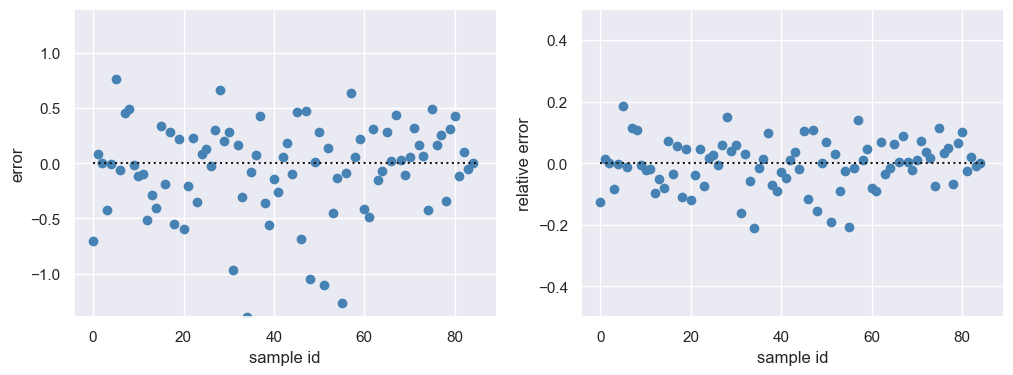

In [61]:
#Plot of how good given and predicted values match on the training data set
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)

*Observations:*

The left scatterplot plots the difference between the predicted and the actual values (the error), while the right scatterplot plots the relative error, which is (predicted - actual values)/actual values.

We see that the observations on the graphs are not too far from 0, which means that the predicted values are not too far from the actual values, especially in relative terms.